In [175]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [176]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# 分類数設定

In [177]:
NUM_CLASSES = 34

# 学習データ読み込み

In [178]:
gesture_labels = [
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
    'у', 'е', 'г', 'щ', 'ц', 'к', 'н', 'и', 'т', 'о', 'с', 'в', 'м', 'л', 'д', 'п', 'р', 'з', 'я', 'ч', 'й', 'ж'
]

In [179]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [180]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [182]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [183]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_16 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 34)             │           374 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,444 (5.64 KB)

 Trainable params: 1,444 (5.64 KB)

 Non-trainable params: 0 (0.00 B)

In [184]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False
)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [185]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [186]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 20s 560ms/step - accuracy: 0.0547 - loss: 3.5821
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0464 - loss: 3.5363 - val_accuracy: 0.0985 - val_loss: 3.4664
Epoch 2/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0703 - loss: 3.4936
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0724 - loss: 3.4679 - val_accuracy: 0.1097 - val_loss: 3.3723
Epoch 3/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0938 - loss: 3.4027
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0932 - loss: 3.3559 - val_accuracy: 0.0948 - val_loss: 3.2129
Epoch 4/1000
 1/38 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0703 - loss: 3.2657
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker

In [187]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 589us/step - accuracy: 0.6636 - loss: 1.3052


In [188]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [189]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[1.21555336e-01 1.12136863e-02 6.91819750e-03 1.18568323e-06
 1.94354635e-03 8.29945579e-02 6.02902360e-02 3.16028338e-04
 1.34152723e-02 1.12705166e-02 4.53543337e-03 2.05501671e-10
 7.64347308e-10 6.76207943e-03 6.13096058e-02 1.82336688e-08
 4.42262826e-04 4.86218676e-10 3.03576495e-02 3.87602222e-06
 2.42179818e-02 1.08545385e-02 4.09692620e-06 4.16523066e-10
 3.90404253e-04 2.10279740e-08 2.78382203e-07 7.71448395e-05
 5.51188700e-02 2.28254357e-04 4.94306907e-04 4.95278537e-01
 6.04819297e-06 3.37123662e-09]
31


# 混同行列

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step


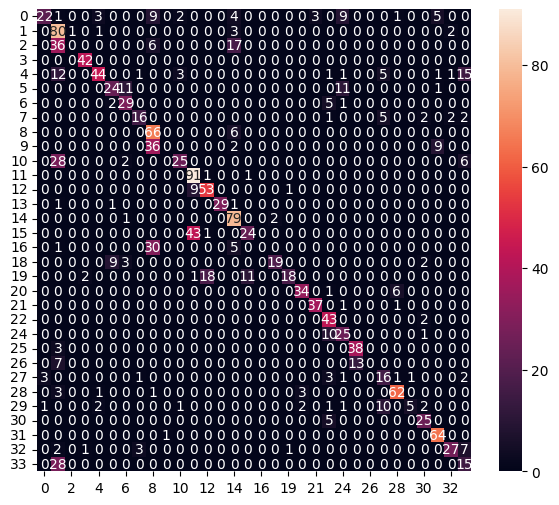

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.37      0.52        59
           1       0.40      0.92      0.55        87
           2       0.00      0.00      0.00        59
           3       0.93      1.00      0.97        42
           4       0.86      0.52      0.65        84
           5       0.67      0.51      0.58        47
           6       0.63      0.78      0.70        37
           7       0.76      0.57      0.65        28
           8       0.45      0.92      0.60        72
           9       0.00      0.00      0.00        47
          10       0.81      0.41      0.54        61
          11       0.63      0.98      0.77        93
          12       0.73      0.84      0.78        63
          13       1.00      0.91      0.95        32
          14       0.68      0.96      0.79        82
          15       0.67      0.35      0.46        68
          16       1.00      0.00      0.00        36
     

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g', square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred, zero_division=1))

# Example usage
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)


# Tensorflow-Lite用のモデルへ変換

In [191]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [192]:
import tensorflow as tf

# Load the trained Keras Sequential model
model = tf.keras.models.load_model('model/keypoint_classifier/keypoint_classifier.keras')

# Create a tf.function for the model
@tf.function(input_signature=[tf.TensorSpec(shape=[None, 42], dtype=tf.float32)])
def model_func(inputs):
    return model(inputs)

# Get a concrete function from the tf.function
concrete_func = model_func.get_concrete_function()

# Convert the model to TensorFlow Lite using the concrete function and the trackable model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func], trackable_obj=model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Save the converted model
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'
with open(tflite_save_path, 'wb') as f:
    f.write(tflite_quantized_model)

print("Model successfully converted to TensorFlow Lite and saved at:", tflite_save_path)


Model successfully converted to TensorFlow Lite and saved at: model/keypoint_classifier/keypoint_classifier.tflite


2024-07-14 19:36:51.233541: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-07-14 19:36:51.233646: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
W0000 00:00:1720967811.251458   67537 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1720967811.251475   67537 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.


# 推論テスト

In [193]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [194]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [195]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [196]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 142 μs, sys: 17 μs, total: 159 μs
Wall time: 92 μs


In [197]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.2155532e-01 1.1213694e-02 6.9182026e-03 1.1856831e-06 1.9435480e-03
 8.2994536e-02 6.0290273e-02 3.1602892e-04 1.3415288e-02 1.1270519e-02
 4.5354390e-03 2.0550281e-10 7.6435153e-10 6.7620846e-03 6.1309613e-02
 1.8233735e-08 4.4226315e-04 4.8622034e-10 3.0357646e-02 3.8760290e-06
 2.4217991e-02 1.0854536e-02 4.0969330e-06 4.1652456e-10 3.9040457e-04
 2.1028011e-08 2.7838266e-07 7.7144832e-05 5.5118915e-02 2.2825465e-04
 4.9430755e-04 4.9527848e-01 6.0482034e-06 3.3712424e-09]
31
